<a href="https://colab.research.google.com/github/Ezemettler/PI2-DA/blob/main/EDA_PI2DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance   # Instalamos libreria yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 8.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# importamos librerias

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# ¿Qué es el S&P 500?

El Indice Standard & Poor's 500, más conocido como S&P500 , es un conjunto de las 500 mayores empresas que cotizan en las bolsas de Estados Unidos ponderadas según su capitalización bursátil.

In [3]:
# Traemos el listado de empresas del S&P500 
# el [0] trae la primer tabla que aparece en la web de wikipedia

empresas = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
empresas.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


## Symbol ticker

El símbolo ticker o clave de pizarra es un código que hace referencia a las acciones de una compañía cotizada en un mercado de valores. 

Este código es único para las acciones de cada empresa, por lo que no habrá dos acciones de empresas diferentes con el mismo ticker.

In [4]:
# Pasamos los valores de la columna symbol a una lista
# Symbol es la abreviatura del n

lista_symbol = list(set(empresas.Symbol))
lista_symbol[0:5]     # Mostramos los primeros 5 valores de la lista

['AEP', 'CBOE', 'WBD', 'HON', 'GE']

In [5]:
# Vamos a traer por cada symbol, las cotizaciones desde el 2000-01-01 al 2022-12-31

data_list = []              # Creamos una lista donde vamos a guardar los datos descargados
for ticker in lista_symbol:
  data = yf.download(ticker, start='2000-01-01', end='2022-12-31')  # Descarga de datos de cada ticker en el período
  data['Symbol'] = ticker   # Creamos columna y agregamos el symbol de la compania
  data_list.append(data)    # Agregamos la data generada del ticker al final de la lista

df = pd.concat(data_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2000-01-03,32.0000,32.0000,31.1250,31.4375,11.347200,396900.0,AEP
2000-01-04,31.3750,31.9375,31.3750,31.8125,11.482556,325500.0,AEP
2000-01-05,31.8125,33.1250,31.8125,33.0000,11.911180,392200.0,AEP
2000-01-06,32.7500,33.6875,32.7500,33.1875,11.978851,433000.0,AEP
2000-01-07,33.3750,33.7500,33.0625,33.6250,12.136766,250500.0,AEP


In [7]:
# Mostramos info relevante del dataframe generado.
# Cant de columnas y registros, tipos de datos por cada columna, espacio en memoria del dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2587986 entries, 2000-01-03 to 2022-12-30
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Open       float64
 1   High       float64
 2   Low        float64
 3   Close      float64
 4   Adj Close  float64
 5   Volume     float64
 6   Symbol     object 
dtypes: float64(6), object(1)
memory usage: 158.0+ MB


In [9]:
df.isna().sum()   # Verificamos valores faltantes en las columnas

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

In [10]:
df.corr()   # % de Correlación de variables

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999909,0.999899,0.999815,0.992691,-0.051687
High,0.999909,1.000000,0.999861,0.999909,0.992884,-0.051484
Low,0.999899,0.999861,1.000000,0.999911,0.992724,-0.051915
Close,0.999815,0.999909,0.999911,1.000000,0.992892,-0.051707
Adj Close,0.992691,0.992884,0.992724,0.992892,1.000000,-0.047918
Volume,-0.051687,-0.051484,-0.051915,-0.051707,-0.047918,1.000000


Text(0.5, 1.0, 'Correlación de variables')

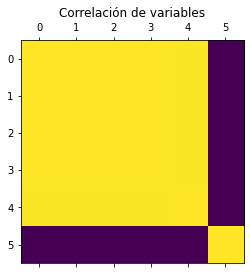

In [11]:
plt.matshow(df.corr())    # Gráfico de correlación de variables
plt.title('Correlación de variables')

## Precios historicos

Vamos a graficar el promedio de los valores de cierre totales de todas las companias, para tener una visión general de los mercados

In [12]:
df['Date'] = df.index   # Agregamos una columna para la fecha
df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date
Date,,,,,,,,
2000-01-03,32.0000,32.0000,31.1250,31.4375,11.347200,396900.0,AEP,2000-01-03
2000-01-04,31.3750,31.9375,31.3750,31.8125,11.482556,325500.0,AEP,2000-01-04
2000-01-05,31.8125,33.1250,31.8125,33.0000,11.911180,392200.0,AEP,2000-01-05
2000-01-06,32.7500,33.6875,32.7500,33.1875,11.978851,433000.0,AEP,2000-01-06
2000-01-07,33.3750,33.7500,33.0625,33.6250,12.136766,250500.0,AEP,2000-01-07


In [13]:
df.reset_index(drop = True, inplace = True)   # Reseteamos los indices
df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date
0,32.0000,32.0000,31.1250,31.4375,11.347200,396900.0,AEP,2000-01-03
1,31.3750,31.9375,31.3750,31.8125,11.482556,325500.0,AEP,2000-01-04
2,31.8125,33.1250,31.8125,33.0000,11.911180,392200.0,AEP,2000-01-05
3,32.7500,33.6875,32.7500,33.1875,11.978851,433000.0,AEP,2000-01-06
4,33.3750,33.7500,33.0625,33.6250,12.136766,250500.0,AEP,2000-01-07


In [14]:
df['Year'] = df['Date'].dt.year   # Vamos a generar una columna con el año para luego graficar
df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date,Year
0,32.0000,32.0000,31.1250,31.4375,11.347200,396900.0,AEP,2000-01-03,2000
1,31.3750,31.9375,31.3750,31.8125,11.482556,325500.0,AEP,2000-01-04,2000
2,31.8125,33.1250,31.8125,33.0000,11.911180,392200.0,AEP,2000-01-05,2000
3,32.7500,33.6875,32.7500,33.1875,11.978851,433000.0,AEP,2000-01-06,2000
4,33.3750,33.7500,33.0625,33.6250,12.136766,250500.0,AEP,2000-01-07,2000


In [15]:
hist_price = df.groupby(['Year']).mean()    # Armamos un promedio de precios por año 
hist_price.head()

,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,
2000,33.499679,34.227973,32.744152,33.491234,21.788722,5.278260e+06
2001,31.631970,32.130436,31.097700,31.631751,20.181038,5.514821e+06
2002,28.936200,29.377756,28.451011,28.920444,18.856333,5.680944e+06
2003,28.677927,28.999709,28.346035,28.696562,19.230157,5.367761e+06
2004,34.919678,35.260026,34.584173,34.934846,23.973171,6.172277e+06


In [16]:
hist_price['Year'] = hist_price.index               # Agregamos la columna año
hist_price.reset_index(drop = True, inplace = True) # luego resetear el indice
hist_price.head()

,Open,High,Low,Close,Adj Close,Volume,Year
0,33.499679,34.227973,32.744152,33.491234,21.788722,5.278260e+06,2000
1,31.631970,32.130436,31.097700,31.631751,20.181038,5.514821e+06,2001
2,28.936200,29.377756,28.451011,28.920444,18.856333,5.680944e+06,2002
3,28.677927,28.999709,28.346035,28.696562,19.230157,5.367761e+06,2003
4,34.919678,35.260026,34.584173,34.934846,23.973171,6.172277e+06,2004


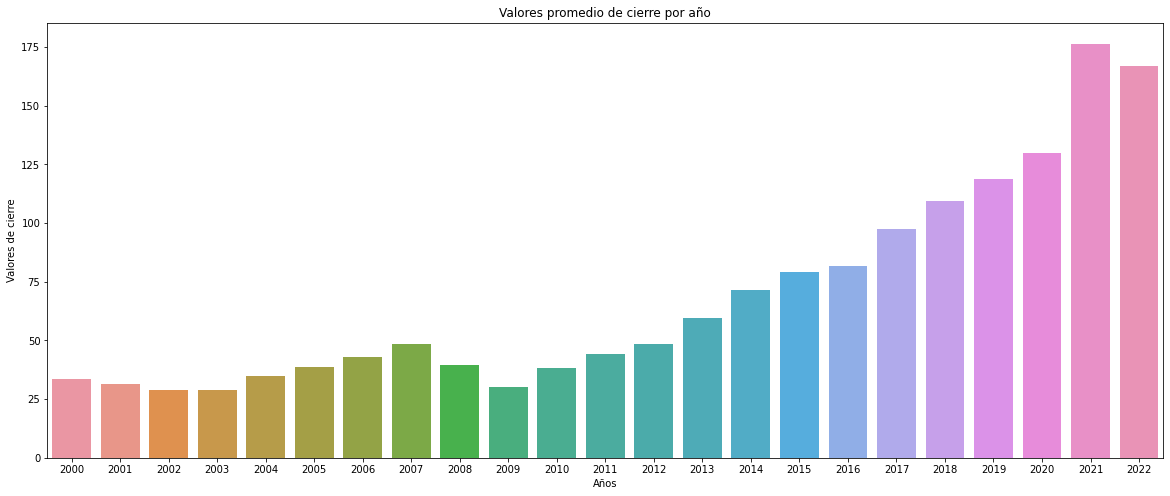

In [17]:
# Graficamos
plt.figure(figsize=(20, 8))       # Tamaño de gráfico
sns.barplot(x='Year', y='Close', data=hist_price) 
plt.title('Valores promedio de cierre por año')
plt.xlabel('Años')
plt.ylabel('Valores de cierre')
plt.show()

In [18]:
print("Precio prom de cierre")
min = hist_price['Close'].idxmin()          # Pico min del gráfico
print("Min:", hist_price['Year'].iloc[min] )
max = hist_price['Close'].idxmax()          # Pico max del gráfico
print("Max:", hist_price['Year'].iloc[max] )

Precio prom de cierre
Min: 2003
Max: 2021


# Observaciones

## Precios mínimos

Notamos como el mínimo de precio de cierre se da en el año 2003, luego del periodo de crisis llamado 'burbuja de las .com'.

\
También podemos observar en el periodo 2008/2009 vuelve a aparecer un periodo de baja del mercado, debido al colapso de la burbuja inmobiliaria en los Estados Unidos, que provocó aproximadamente en octubre de 2007 la llamada 'crisis de las hipotecas subprime'.

\
## Precios máximos
En el año 2021 se da el pico máximo de los ultimos años, correspondiente al periodo de recuperación económica post covid.

\
# Presente
En el período presente, por lo visto en el gráfico en 2022 ya hubo una baja con respecto al 2021, en parte debido a la suba de tasas de interés por parte de la reserva federal de los Estados Unidos para intentar frenar la inflación, lo que causa un período de recesión económica. 


# Relación entre tasas de interes Vs precio de acciones

Vamos a trabajar con los datos de las tasas de interes de la reserva federal de los Estados Unidos para sacar nuevas conclusiones.

In [19]:
from google.colab import drive  # Vinculamos google colab con google drive para importar el dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Traemos el listado de tasas de interes de la fed
# fuente: https://datos.bancomundial.org/indicator/FR.INR.RINR?end=2021&locations=US&start=2000&view=chart

tasas_fed = pd.read_csv('/content/drive/MyDrive/Formación/Henry/PI2 DA/tasas_usa.csv', sep=',', encoding='latin-1', decimal=',')
tasas_fed.head()

,year,tasa
0,2000,6.8
1,2001,4.6
2,2002,3.1
3,2003,2.1
4,2004,1.6


In [21]:
tasas_fed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    23 non-null     int64  
 1   tasa    23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


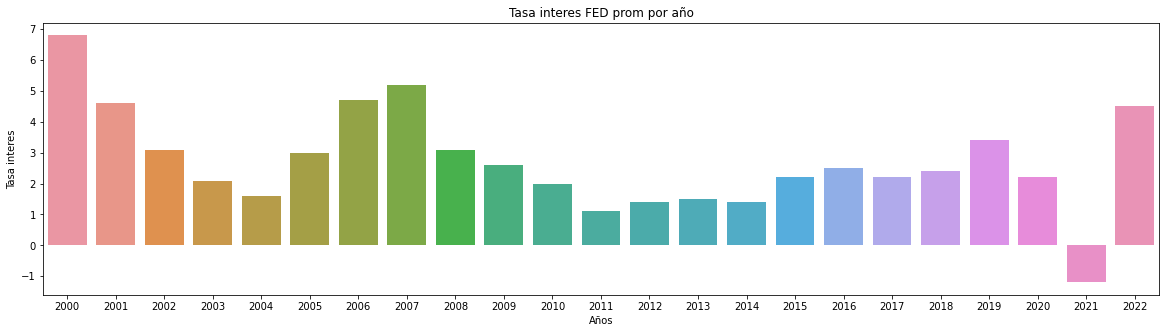

In [22]:
# Graficamos

plt.figure(figsize=(20, 5))       # Tamaño de gráfico
sns.barplot(x='year', y='tasa', data=tasas_fed) 
plt.title('Tasa interes FED prom por año')
plt.xlabel('Años')
plt.ylabel('Tasa interes')
plt.show()

La relación entre tasas de interes de la reserva federal de los EEUU y el precio de las acciones es basicamente, que las acciones bajan cuando las tasas suben y viceversa.

\
Podemos observar en los gáficos de tasas de interés y de precio de acciones (gráfico anterior), justamente en años donde las tasas son más altas, ese mismo año o el año siguiente sufre una perdida de valor en las acciones.

Ejemplos:
+ Año 2000: Tasa de interés alta, caida de precios de acciones hasta 2003.
+ Año 2004: Tasa de interés baja, subida de precios de acciones hasta 2007.
+ Año 2007: Tasa de interés alta, caida de precios de acciones hasta 2009.
+ Año 2011: Tasa de interés baja, subida d eprecios de acciones hasta 2020.


Si bien no es la única variable que afecta al precio de las acciones, es una variable que cumple con esa relación que mencionabamos al inicio.

\
En el año 2022 hubo un fuerte aumento de las tasas de interés, que sigue con la misma tendencia al inicio del año 2023, por lo cual, es posible que el precio de las acciones siga en baja.

\
Una alternativa de inversión que podría ser más rentable y de menor riesgo, es la compra de **bonos**.

## ¿Qué día de la semana es mejor para invertir?

In [23]:
df['dayOfWeek'] = df['Date'].dt.day_name()  # Agregamos una columna para obtener el dia de la semana
df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date,Year,dayOfWeek
0,32.0000,32.0000,31.1250,31.4375,11.347200,396900.0,AEP,2000-01-03,2000,Monday
1,31.3750,31.9375,31.3750,31.8125,11.482556,325500.0,AEP,2000-01-04,2000,Tuesday
2,31.8125,33.1250,31.8125,33.0000,11.911180,392200.0,AEP,2000-01-05,2000,Wednesday
3,32.7500,33.6875,32.7500,33.1875,11.978851,433000.0,AEP,2000-01-06,2000,Thursday
4,33.3750,33.7500,33.0625,33.6250,12.136766,250500.0,AEP,2000-01-07,2000,Friday


In [25]:
df_byDate['saldo'] = df_byDate['Close'] - df_byDate['Open'] # Agregamos columna saldo, como diferencia entre precio de cierre y apertura.
df_byDate.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date,Year,dayOfWeek,saldo
0,32.000000,32.00000,31.125000,31.437500,11.347200,396900.0,AEP,2000-01-03,2000,Monday,-0.562500
671867,4.510417,4.53125,4.208333,4.333333,3.262595,719400.0,CHD,2000-01-03,2000,Monday,-0.177084
2582199,17.750000,17.87500,16.687500,17.375000,10.146914,3833200.0,WM,2000-01-03,2000,Monday,-0.375000
771545,20.250000,20.37500,19.812500,20.125000,12.120330,694200.0,NSC,2000-01-03,2000,Monday,-0.125000
1525272,29.000000,29.31250,27.625000,27.750000,13.378921,1010500.0,NWL,2000-01-03,2000,Monday,-1.250000


In [26]:
saldo_byDate = df_byDate.groupby('dayOfWeek').mean()  # Calculamos el prom de saldo por día de la semana
saldo_byDate

,Open,High,Low,Close,Adj Close,Volume,Year,saldo
dayOfWeek,,,,,,,,
Friday,71.940985,72.755520,71.069842,71.946436,63.519058,6.731933e+06,2011.603041,0.005451
Monday,71.783120,72.602822,70.911421,71.765777,63.343534,6.251396e+06,2011.584593,-0.017343
Thursday,72.002971,72.903216,71.120883,72.052995,63.631133,6.820993e+06,2011.630326,0.050023
Tuesday,72.101903,72.942774,71.223955,72.090617,63.678074,6.624687e+06,2011.632089,-0.011286
Wednesday,71.923734,72.800869,71.047839,71.933806,63.511330,6.795636e+06,2011.610994,0.010072


In [27]:
saldo_byDate['dayOfWeek'] = saldo_byDate.index        # Agregamos columna
saldo_byDate.reset_index(drop=True, inplace=True)     # Reseteamos indices
saldo_byDate = saldo_byDate[ ['dayOfWeek', 'saldo'] ] # Nos quedamos solo con estas 2 columnas
saldo_byDate.sort_values('saldo', ascending=False)    # Ordenamos por saldo
saldo_byDate

,dayOfWeek,saldo
0,Friday,0.005451
1,Monday,-0.017343
2,Thursday,0.050023
3,Tuesday,-0.011286
4,Wednesday,0.010072


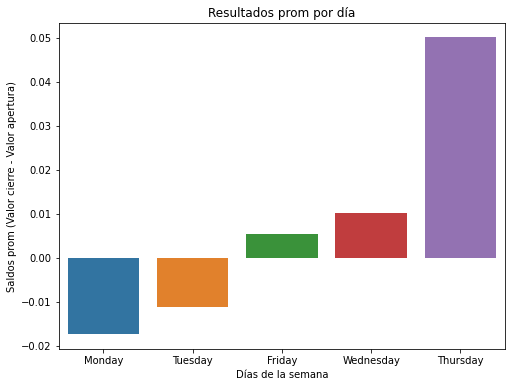

In [28]:
# Graficamos

plt.figure(figsize=(8, 6))       # Tamaño de gráfico
sns.barplot(x='dayOfWeek', y='saldo', data=saldo_byDate, order=saldo_byDate.sort_values('saldo').dayOfWeek) 
plt.title('Resultados prom por día')
plt.xlabel('Días de la semana')
plt.ylabel('Saldos prom (Valor cierre - Valor apertura)')
plt.show()

Sin dudas, el día que mejor resultados hubo fue el día Jueves.

# Industrias que integran el S&P500

In [29]:
industrias = empresas.groupby('GICS Sector').count()  # Agrupamos por sector/industria
industrias['nombre'] = industrias.index               # Agregamos columna nombre
industrias.reset_index(drop=True, inplace=True)       # Reseteamos indices
industrias = industrias[ ['nombre', 'Symbol'] ]       # Nos quedamos con estas 2 columnas
industrias.rename(columns={'Symbol': 'cant'}, inplace=True) # Cambio de nombre de columna
industrias

,nombre,cant
0,Communication Services,25
1,Consumer Discretionary,56
2,Consumer Staples,33
3,Energy,23
4,Financials,67
5,Health Care,64
6,Industrials,70
7,Information Technology,76
8,Materials,29
9,Real Estate,30


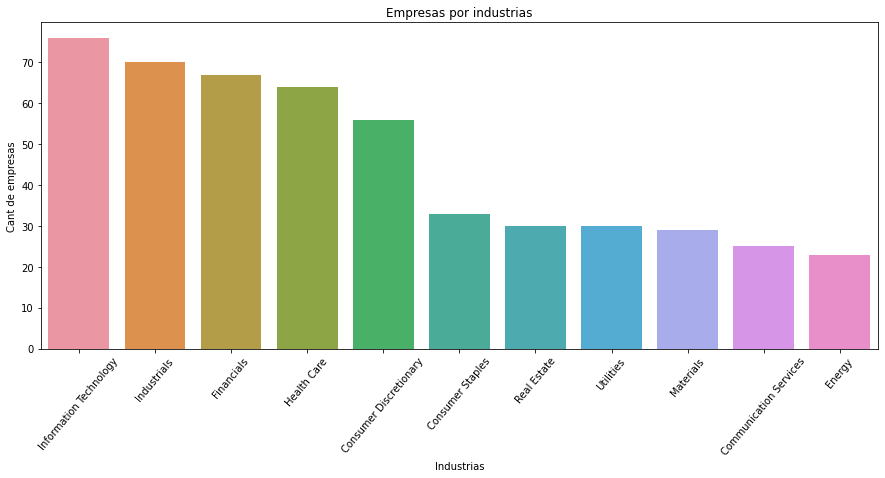

In [30]:
# Graficamos

plt.figure(figsize=(15, 6))       # Tamaño de gráfico
sns.barplot(x='nombre', y='cant', data=industrias, order=industrias.sort_values('cant', ascending=False).nombre) 
plt.title('Empresas por industrias')  # Titulo del gráfico
plt.xlabel('Industrias')              # Etiqueta eje x
plt.xticks(rotation = 50)             # Rotación de etiquetas, para que sea legible
plt.ylabel('Cant de empresas')        # Etiqueta eje y
plt.show()

Tomamos 3 industrias y analizamos como se comportaron los últimos años:
+ Information Technology
+ Real Estate
+ Energy

In [31]:
df_3ind = pd.merge(left=df, right=empresas, how='left', left_on='Symbol', right_on='Symbol')  # Unimos los dataset para trabajar con precios de acciones y el tipo de industria
df_3ind.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date,Year,dayOfWeek,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,32.0000,32.0000,31.1250,31.4375,11.347200,396900.0,AEP,2000-01-03,2000,Monday,American Electric Power,Utilities,Electric Utilities,"Columbus, Ohio",1957-03-04,4904,1906
1,31.3750,31.9375,31.3750,31.8125,11.482556,325500.0,AEP,2000-01-04,2000,Tuesday,American Electric Power,Utilities,Electric Utilities,"Columbus, Ohio",1957-03-04,4904,1906
2,31.8125,33.1250,31.8125,33.0000,11.911180,392200.0,AEP,2000-01-05,2000,Wednesday,American Electric Power,Utilities,Electric Utilities,"Columbus, Ohio",1957-03-04,4904,1906
3,32.7500,33.6875,32.7500,33.1875,11.978851,433000.0,AEP,2000-01-06,2000,Thursday,American Electric Power,Utilities,Electric Utilities,"Columbus, Ohio",1957-03-04,4904,1906
4,33.3750,33.7500,33.0625,33.6250,12.136766,250500.0,AEP,2000-01-07,2000,Friday,American Electric Power,Utilities,Electric Utilities,"Columbus, Ohio",1957-03-04,4904,1906


In [32]:
df_3ind = df_3ind[ ['Symbol', 'Year', 'GICS Sector', 'Open', 'Close', ] ]   # Nos quedamos con estas columnas
df_3ind.rename(columns={'GICS Sector': 'Sector'}, inplace=True)             # Cambio de nombre de columna
df_3ind.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Symbol,Year,Sector,Open,Close
0,AEP,2000,Utilities,32.0000,31.4375
1,AEP,2000,Utilities,31.3750,31.8125
2,AEP,2000,Utilities,31.8125,33.0000
3,AEP,2000,Utilities,32.7500,33.1875
4,AEP,2000,Utilities,33.3750,33.6250


In [33]:
# Filtramos solo los sectores elegidos
df_tecnology = df_3ind [ df_3ind.Sector.isin(['Information Technology']) ]   
df_estate = df_3ind [ df_3ind.Sector.isin(['Real Estate']) ]    
df_energy = df_3ind [ df_3ind.Sector.isin(['Energy']) ]         

In [34]:
# Armamos un promedio de precios por año 
hist_tecnology = df_tecnology.groupby(['Year']).mean()    
hist_estate = df_estate.groupby(['Year']).mean()    
hist_energy = df_energy.groupby(['Year']).mean()    

In [35]:
# Agregamos la columna año
hist_tecnology['Year'] = hist_tecnology.index               
hist_estate['Year'] = hist_estate.index
hist_energy['Year'] = hist_energy.index

# luego resetear el indice
hist_tecnology.reset_index(drop = True, inplace = True)     
hist_estate.reset_index(drop = True, inplace = True)
hist_energy.reset_index(drop = True, inplace = True)

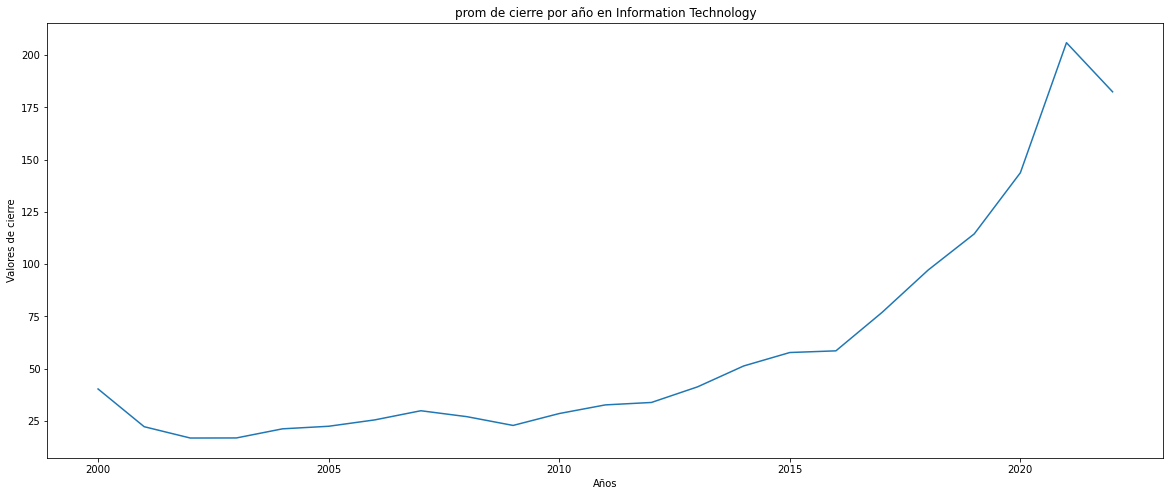

In [36]:
# Grafico tecnology
plt.figure(figsize=(20, 8))       # Tamaño de gráfico
sns.lineplot(x='Year', y='Close', data=hist_tecnology) 
plt.title('prom de cierre por año en Information Technology')
plt.xlabel('Años')
plt.ylabel('Valores de cierre')
plt.show()

### Industria: Information Technology

Esta industria se vió claramente beneficiada los últimos años por causa de la pandemia.

\
El uso de la tecnología fue muy importante para continuar con el trabajo, la educación, realizar compras, y muchas cosas más que tuvieron que llevarse a cabo vía herramientas tecnologicas.

\
Con los nuevos avances que están en este mercado, como la inteligencia artificial, puede que esta tendencia al alza continue por un largo período más, lo cual lo convierte en una industria atractiva para invertir.

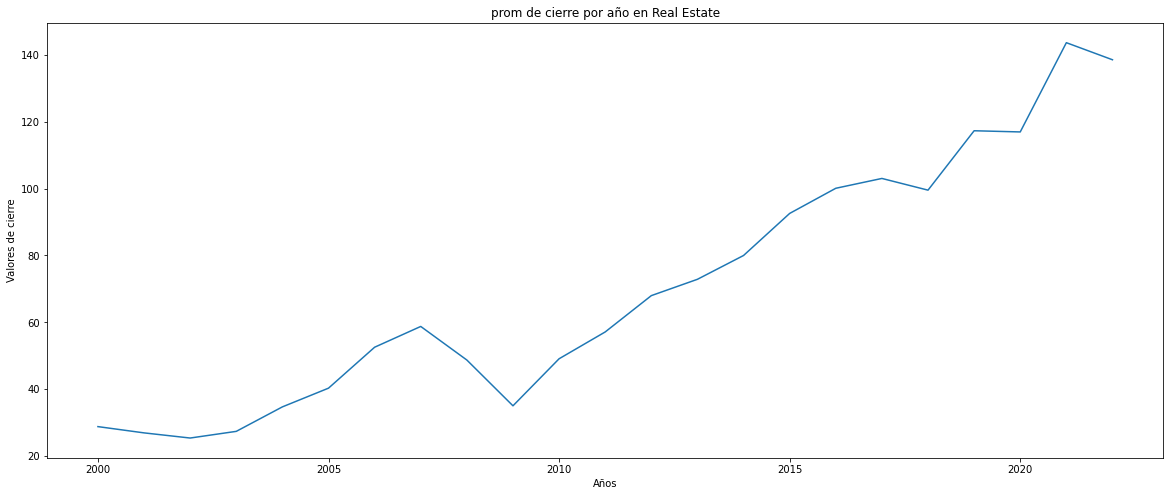

In [37]:
# Grafico real estate
plt.figure(figsize=(20, 8))       # Tamaño de gráfico
sns.lineplot(x='Year', y='Close', data=hist_estate) 
plt.title('prom de cierre por año en Real Estate')
plt.xlabel('Años')
plt.ylabel('Valores de cierre')
plt.show()

## Industria: Real Estate

Este sector suele ser el menos volatil de todos, y siempre parecería estar en continuo crecimiento.

\
Claramente esto se vió interrumpido en los años 2008/09 al estallar la crisis inmobiliaria en los Estados Unidos y parece haberse recuperado.

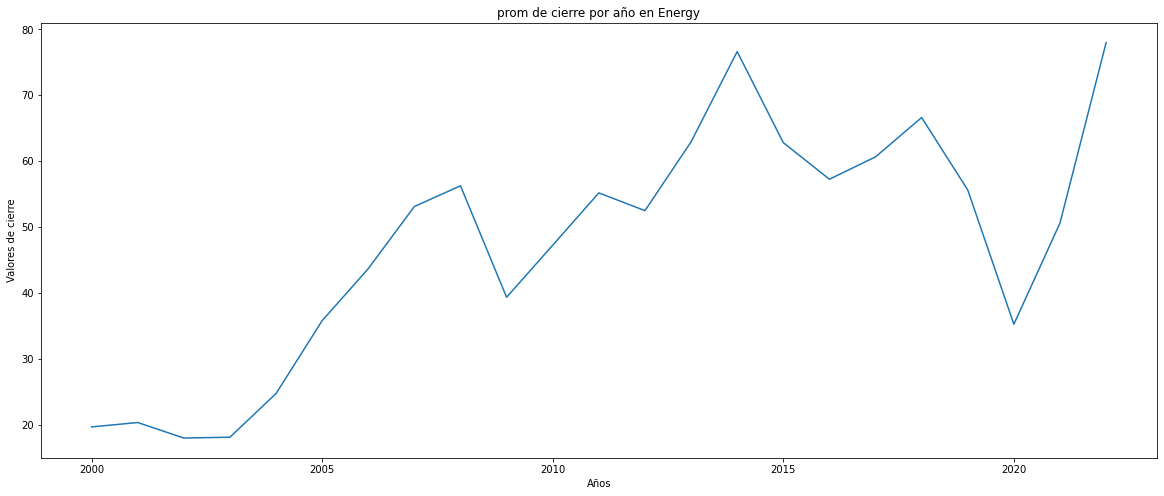

In [38]:
# Grafico energy
plt.figure(figsize=(20, 8))       # Tamaño de gráfico
sns.lineplot(x='Year', y='Close', data=hist_energy) 
plt.title('prom de cierre por año en Energy')
plt.xlabel('Años')
plt.ylabel('Valores de cierre')
plt.show()

## Industria: Energy

El sector de energía se encuentra en su pico máximo en el año 2022, luego de su caida en la epoca de pandemia (Año 2020) debido al menor consumo de energía en ese período.

\
Es un sector que en este momento, al estar en su tope, puede que sea dificil que aumente aún más y ganar un buen retorno, ya que entrariamos en la inversión justo cuando está al tope de la ola.

\
Incluso actualmente por motivo de la guerra entre Rusia y Ucrania, sufrió aún más un aumento de precio, que tal vez cuando se resuelva el conflicto podría bajar.

## Recomendaciones de empresas para invertir

### Empresas que dieron mayor cant de dividendos

In [39]:
# Codigo generado con chatgpt

# Descargar la lista de empresas del S&P500
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = tickers.Symbol.tolist()

# Crear un dataframe para almacenar los dividendos de cada empresa
dividends = pd.DataFrame(columns=['Ticker', 'Date', 'Dividend'])

# Iterar a través de cada empresa y extraer los dividendos
for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        dividend_history = stock.dividends.reset_index()
        dividend_history['Ticker'] = ticker
        dividends = dividends.append(dividend_history, ignore_index=True)
    except:
        pass

# Filtrar los dividendos de los últimos 5 años
dividends = dividends[dividends['Date'] >= dividends['Date'].max() - pd.DateOffset(years=5)]


Got error from yahoo api for ticker BRK.B, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- BRK.B: No timezone found, symbol may be delisted
BF.B: 1d data not available for startTime=-2208994789 and endTime=1677424921. Only 100 years worth of day granularity data are allowed to be fetched per request.


In [42]:
dividends = dividends[ ['Ticker', 'Dividends'] ]  # Nos quedamos con estas columnas
dividends.head()

,Ticker,Dividends
223,MMM,1.36
224,MMM,1.36
225,MMM,1.36
226,MMM,1.44
227,MMM,1.44


In [43]:
dividendos_byCia = dividends.groupby('Ticker').sum()      # Agrupamos por Ticker
dividendos_byCia['Ticker'] = dividendos_byCia.index       # Agregamos columna Ticker para que no quede como indice
dividendos_byCia.reset_index(drop=True, inplace=True)     # Reseteamos indices
dividendos_byCia = dividendos_byCia[ ['Ticker', 'Dividends'] ]  # Cambiamos orden de columnas
dividendos_byCia.sort_values('Dividends', ascending=False, inplace=True)  # Ordenamos por dividendo descendente
dividendos_byCia.head()

,Ticker,Dividends
204,KDP,107.32
353,TDG,81.00
52,BLK,75.78
38,AVGO,67.75
309,PSA,53.15


Estas son las 5 empresas que más ***dividendos*** dieron los últimos 5 años:

+ 1° KDP: Keurig Dr Pepper Inc
+ 2° TDG: TransDigm Group Incorporated
+ 3° BLK: BlackRock, Inc
+ 4° AVGO: Broadcom Inc
+ 5° PSA: Public Storage 

### Empresas que dieron mayores ganancias en los últimos 5 años

In [64]:
# Obtener los datos de las últimas 5 años para cada empresa en la lista
data = yf.download(lista_symbol, period="5y")

# Calcular el porcentaje de ganancias para cada empresa
profits = (data['Adj Close'].iloc[-1] - data['Adj Close'].iloc[0]) / data['Adj Close'].iloc[0] * 100

# Ordenar las empresas por porcentaje de ganancias y seleccionar las 5 primeras
top_profits = profits.sort_values(ascending=False).head(5)

# Imprimir los símbolos de las empresas y su porcentaje de ganancias
print(top_profits)

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
ENPH    7323.880663
TSLA     726.254877
DXCM     672.968187
AMD      528.743928
ETSY     487.618364
dtype: float64


In [75]:
top_ganancias = pd.DataFrame(top_profits)
top_ganancias

,0
ENPH,7323.880663
TSLA,726.254877
DXCM,672.968187
AMD,528.743928
ETSY,487.618364


In [76]:
top_ganancias['empresa'] = top_ganancias.index        # Agregamos la columna empresa para que no quede como indice
top_ganancias.reset_index(drop=True, inplace=True)    # Reseteamos indices
top_ganancias = top_ganancias[ ['empresa', 0] ]       # Cambio de orden de columnas
top_ganancias.rename(columns={0: '%_ganancia_5y'}, inplace=True)  # Cambio nombre columna
top_ganancias

,empresa,%_ganancia_5y
0,ENPH,7323.880663
1,TSLA,726.254877
2,DXCM,672.968187
3,AMD,528.743928
4,ETSY,487.618364


Las empresas que obtuvieron mayores ganancias (en %) en los últimos 5 años fueron:

+ 1° ENPH: Enphase Energy, Inc 
+ 2° TSLA: Tesla, Inc
+ 3° DXCM: DexCom, Inc
+ 4° AMD:  Advanced Micro Devices, Inc
+ 5° ETSY: Etsy, Inc